##### File 1: Basic data cleaning for resumes 

In [137]:
import time   # to time 'em opns
t0 = time.time()    # start timer
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import csv
import string
from nltk.corpus import stopwords
t1 = time.time()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

time.taken = round(t1-t0, 3)
print(time.taken)
print("\n")    # print newline

0.001




In [83]:
# importing the csv file into the dataframe
datafile = pd.read_csv(r'//Users/Dell/Desktop/FP1 Project - All Files/Final_Applicants_list.csv')
Candidate_Resume = pd.DataFrame(datafile, columns= ['Category','Resume','Exp (Years)','Name','Current Salary','Expected Salary','Offered Salary','Age','Current Location','Offered Location','Offer Status'])
print(Candidate_Resume)

                    Category  \
0            DevOps Engineer   
1               Data Science   
2               Data Science   
3               Data Science   
4               Data Science   
...                      ...   
1243             MS Dynamics   
1244     Java Cloud Services   
1245    Azure Cloud Services   
1246  Azure Devops Architect   
1247             MS Dynamics   

                                                 Resume  Exp (Years)  \
0     technical skills key skills ms technology net ...          NaN   
1     education details  mca   ymcaust  faridabad  h...          NaN   
2     skills c basics iot python matlab data science...          NaN   
3     skills  r  python  sap hana  tableau  sap hana...          NaN   
4     skills  python  tableau  data visualization  r...          NaN   
...                                                 ...          ...   
1243  core competencies  ant  maven  git  bitbucket ...          NaN   
1244  technical skills key skills ms te

In [84]:
# dropping unnecessary columns
Candidate_Resume.drop('Offer Status', axis=1, inplace=True)
Candidate_Resume.drop('Name', axis=1, inplace=True)

In [85]:
#converting the data into lowercase for analysis
Candidate_Resume['Category'] = Candidate_Resume['Category'].str.lower()
Candidate_Resume['Resume'] = Candidate_Resume['Resume'].str.lower()
Candidate_Resume

,Category,Resume,Exp (Years),Current Salary,Expected Salary,Offered Salary,Age,Current Location,Offered Location
0,devops engineer,technical skills key skills ms technology net ...,NaN,2650000,3090000,2960000,43,Pune,Pune
1,data science,education details mca ymcaust faridabad h...,NaN,684000,1240000,1100000,28,Hyderabad,Hyderabad
2,data science,skills c basics iot python matlab data science...,NaN,603000,1120000,1100000,25,Gurgaon,Gurgaon
3,data science,skills r python sap hana tableau sap hana...,NaN,745000,1180000,1080000,25,Bangalore,Bangalore
4,data science,skills python tableau data visualization r...,NaN,762000,1270000,1140000,26,Gurgaon,Gurgaon
...,...,...,...,...,...,...,...,...,...
1243,ms dynamics,core competencies ant maven git bitbucket ...,NaN,1100000,1700000,1700000,35,Chennai,Chennai
1244,java cloud services,technical skills key skills ms technology net ...,NaN,985000,1200000,1200000,31,Hyderabad,Hyderabad
1245,azure cloud services,core skills project program management agil...,NaN,1260000,1700000,1700000,27,Hyderabad,Hyderabad
1246,azure devops architect,core skills project program management agil...,NaN,2525000,3200000,3200000,31,Bangalore,Bangalore


In [86]:
# creating the function for punctuation removal
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

Candidate_Resume['Category'] = Candidate_Resume['Category'].apply(remove_punctuations)
Candidate_Resume['Resume'] = Candidate_Resume['Resume'].apply(remove_punctuations)
Candidate_Resume

,Category,Resume,Exp (Years),Current Salary,Expected Salary,Offered Salary,Age,Current Location,Offered Location
0,devops engineer,technical skills key skills ms technology net ...,NaN,2650000,3090000,2960000,43,Pune,Pune
1,data science,education details mca ymcaust faridabad h...,NaN,684000,1240000,1100000,28,Hyderabad,Hyderabad
2,data science,skills c basics iot python matlab data science...,NaN,603000,1120000,1100000,25,Gurgaon,Gurgaon
3,data science,skills r python sap hana tableau sap hana...,NaN,745000,1180000,1080000,25,Bangalore,Bangalore
4,data science,skills python tableau data visualization r...,NaN,762000,1270000,1140000,26,Gurgaon,Gurgaon
...,...,...,...,...,...,...,...,...,...
1243,ms dynamics,core competencies ant maven git bitbucket ...,NaN,1100000,1700000,1700000,35,Chennai,Chennai
1244,java cloud services,technical skills key skills ms technology net ...,NaN,985000,1200000,1200000,31,Hyderabad,Hyderabad
1245,azure cloud services,core skills project program management agil...,NaN,1260000,1700000,1700000,27,Hyderabad,Hyderabad
1246,azure devops architect,core skills project program management agil...,NaN,2525000,3200000,3200000,31,Bangalore,Bangalore


In [87]:
# removing stopwords
stop = stopwords.words('english')
guided_list = ['key','skills','technical','core','competencies','education','details','faridabad','haryana','above', 'any','else','afterwards', 'alone', 'already', 'always', 'another', 'anyone', 'anything', 'anywhere', 'became', 'because', 'become', 'before', 'beside', 'crib', 'describe', 'during', 'elsewhere', 'empty', 'every', 'everyone', 'everything', 'everywhere', 'fifties', 'forties', 'hence', 'hereafter', 'hereby', 'however', 'hundred', 'inde', 'meanwhile', 'moreover', 'nobody', 'noon', 'nothing', 'nowhere', 'once', 'online', 'otherwise', 'ourselves', 'perhaps', 'please', 'severe', 'since', 'sincere', 'sixties', 'someone', 'something', 'sometime', 'somewhere', 'themselves', 'then', 'thereafter', 'there', 'therefore', 'together', 'twelve', 'twenties', 'verify', 'whatever', 'when', 'whenever', 'whereas', 'whereafter', 'where', 'wherever', 'which', 'yourselves','yourself','your','our']
stop_extended = stop + guided_list
Candidate_Resume['Category_nostop'] = Candidate_Resume['Category'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_extended]))
Candidate_Resume['Resume_nostop'] = Candidate_Resume['Resume'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_extended]))
Candidate_Resume

,Category,Resume,Exp (Years),Current Salary,Expected Salary,Offered Salary,Age,Current Location,Offered Location,Category_nostop,Resume_nostop
0,devops engineer,technical skills key skills ms technology net ...,NaN,2650000,3090000,2960000,43,Pune,Pune,devops engineer,ms technology net sharepoint ms sql oracle pls...
1,data science,education details mca ymcaust faridabad h...,NaN,684000,1240000,1100000,28,Hyderabad,Hyderabad,data science,mca ymcaust data science internship skill data...
2,data science,skills c basics iot python matlab data science...,NaN,603000,1120000,1100000,25,Gurgaon,Gurgaon,data science,c basics iot python matlab data science machin...
3,data science,skills r python sap hana tableau sap hana...,NaN,745000,1180000,1080000,25,Bangalore,Bangalore,data science,r python sap hana tableau sap hana sql sap han...
4,data science,skills python tableau data visualization r...,NaN,762000,1270000,1140000,26,Gurgaon,Gurgaon,data science,python tableau data visualization r studio mac...
...,...,...,...,...,...,...,...,...,...,...,...
1243,ms dynamics,core competencies ant maven git bitbucket ...,NaN,1100000,1700000,1700000,35,Chennai,Chennai,ms dynamics,ant maven git bitbucket jenkins linux ansible ...
1244,java cloud services,technical skills key skills ms technology net ...,NaN,985000,1200000,1200000,31,Hyderabad,Hyderabad,java cloud services,ms technology net sharepoint ms sql oracle pls...
1245,azure cloud services,core skills project program management agil...,NaN,1260000,1700000,1700000,27,Hyderabad,Hyderabad,azure cloud services,project program management agile scrum managem...
1246,azure devops architect,core skills project program management agil...,NaN,2525000,3200000,3200000,31,Bangalore,Bangalore,azure devops architect,project program management agile scrum managem...


In [125]:
data_subset = Candidate_Resume[['Category_nostop','Resume_nostop']]
print(data_subset.shape)
data_subset.head()

(1248, 2)


,Category_nostop,Resume_nostop
0,devops engineer,ms technology net sharepoint ms sql oracle pls...
1,data science,mca ymcaust data science internship skill data...
2,data science,c basics iot python matlab data science machin...
3,data science,r python sap hana tableau sap hana sql sap han...
4,data science,python tableau data visualization r studio mac...


In [126]:
# ensure records are unique
categories = list(Candidate_Resume['Category'].drop_duplicates())
len(categories)

84

In [127]:
integers = list(range(len(categories)))
category_id = dict(zip(categories,integers))
rev_category_id = inv_map = {v: k for k, v in category_id.items()}
category_id

{'devops engineer': 0,
 'data science': 1,
 'business analyst': 2,
 'python developer': 3,
 'dot net core': 4,
 'sap security': 5,
 'java developer': 6,
 'citix': 7,
 'sap bpc embedded': 8,
 'vmware': 9,
 'sap sd': 10,
 'window powershell': 11,
 'sap basis hana': 12,
 'sap bw': 13,
 'azure admin': 14,
 'azure devops': 15,
 'scrum master': 16,
 'qa': 17,
 'window server': 18,
 'aws cloud': 19,
 'sap fiori': 20,
 'devops kubernetes': 21,
 'aem devloper': 22,
 'sfdc lwc': 23,
 'python linux': 24,
 'android developer': 25,
 'dot net developer': 26,
 'data engineer': 27,
 'big data developer': 28,
 'java kafka': 29,
 'dot net': 30,
 'ssis developer': 31,
 'sap cfin': 32,
 'aws devops': 33,
 'sap native hana': 34,
 'gcp devops': 35,
 'graphic designer': 36,
 'adf developer': 37,
 'qa manual': 38,
 'java': 39,
 'hcm': 40,
 'sap mm': 41,
 'azure infra': 42,
 'unix': 43,
 'sap ps': 44,
 'hardware testing': 45,
 'hana modelling': 46,
 'java fullstack': 47,
 'performance testing': 48,
 'sap abap'

In [128]:
data_subset['id'] = data_subset['Category_nostop'].map(category_id)
data_subset.head()

,Category_nostop,Resume_nostop,id
0,devops engineer,ms technology net sharepoint ms sql oracle pls...,0.0
1,data science,mca ymcaust data science internship skill data...,1.0
2,data science,c basics iot python matlab data science machin...,1.0
3,data science,r python sap hana tableau sap hana sql sap han...,1.0
4,data science,python tableau data visualization r studio mac...,1.0


In [144]:
data_subset['id'] = data_subset['id'].fillna(0).astype(np.int64)

In [145]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Category_nostop  1248 non-null   object
 1   Resume_nostop    1248 non-null   object
 2   id               1248 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 29.4+ KB


In [156]:
Candidate_Resume['id'] = Candidate_Resume['Category_nostop'].map(category_id)
Candidate_Resume.head()

,Category,Resume,Exp (Years),Current Salary,Expected Salary,Offered Salary,Age,Current Location,Offered Location,Category_nostop,Resume_nostop,id
0,devops engineer,technical skills key skills ms technology net ...,NaN,2650000,3090000,2960000,43,Pune,Pune,devops engineer,ms technology net sharepoint ms sql oracle pls...,0.0
1,data science,education details mca ymcaust faridabad h...,NaN,684000,1240000,1100000,28,Hyderabad,Hyderabad,data science,mca ymcaust data science internship skill data...,1.0
2,data science,skills c basics iot python matlab data science...,NaN,603000,1120000,1100000,25,Gurgaon,Gurgaon,data science,c basics iot python matlab data science machin...,1.0
3,data science,skills r python sap hana tableau sap hana...,NaN,745000,1180000,1080000,25,Bangalore,Bangalore,data science,r python sap hana tableau sap hana sql sap han...,1.0
4,data science,skills python tableau data visualization r...,NaN,762000,1270000,1140000,26,Gurgaon,Gurgaon,data science,python tableau data visualization r studio mac...,1.0


In [157]:
Candidate_Resume['id'] = Candidate_Resume['id'].fillna(0).astype(np.int64)

In [158]:
# We would be filtering the words which occur in less than <2% of the documents and >98% of the documents 
# since these dont add much value to our analysis

tf = CountVectorizer(min_df = 0.02 , max_df= 0.98, stop_words='english')
tfidf = TfidfVectorizer(min_df = 0.02 , max_df= 0.98, stop_words='english')

%time dtm = pd.DataFrame(tf.fit_transform(Candidate_Resume.iloc[:,0]).toarray(),columns=tf.get_feature_names_out()) # 12.3s
%time dtm_idf = pd.DataFrame(tfidf.fit_transform(Candidate_Resume.iloc[:,0]).toarray(),columns=tfidf.get_feature_names_out()) # 12.5s

CPU times: user 11.7 ms, sys: 889 µs, total: 12.6 ms
Wall time: 12.1 ms
CPU times: user 6.61 ms, sys: 367 µs, total: 6.98 ms
Wall time: 6.93 ms


In [159]:
dtm.head() # what does the DTM look like?

,analyst,business,data,developer,devops,engineer,python,sap,science
0,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1


In [160]:
dtm_idf.head()

,analyst,business,data,developer,devops,engineer,python,sap,science
0,0.0,0.0,0.000000,0.0,0.686581,0.727054,0.0,0.0,0.00000
1,0.0,0.0,0.704896,0.0,0.000000,0.000000,0.0,0.0,0.70931
2,0.0,0.0,0.704896,0.0,0.000000,0.000000,0.0,0.0,0.70931
3,0.0,0.0,0.704896,0.0,0.000000,0.000000,0.0,0.0,0.70931
4,0.0,0.0,0.704896,0.0,0.000000,0.000000,0.0,0.0,0.70931


In [161]:
X_train, X_test, y_train, y_test = train_test_split(dtm,data_subset.iloc[:,-1])
X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(dtm_idf,data_subset.iloc[:,-1])

In [162]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.8525641025641025

In [163]:
%time clf.fit(X_train_idf,y_train_idf)
y_pref_idf = clf.predict(X_test_idf)

clf.score(X_test_idf,y_test_idf)

CPU times: user 6.07 ms, sys: 2.58 ms, total: 8.66 ms
Wall time: 5.86 ms


0.8621794871794872

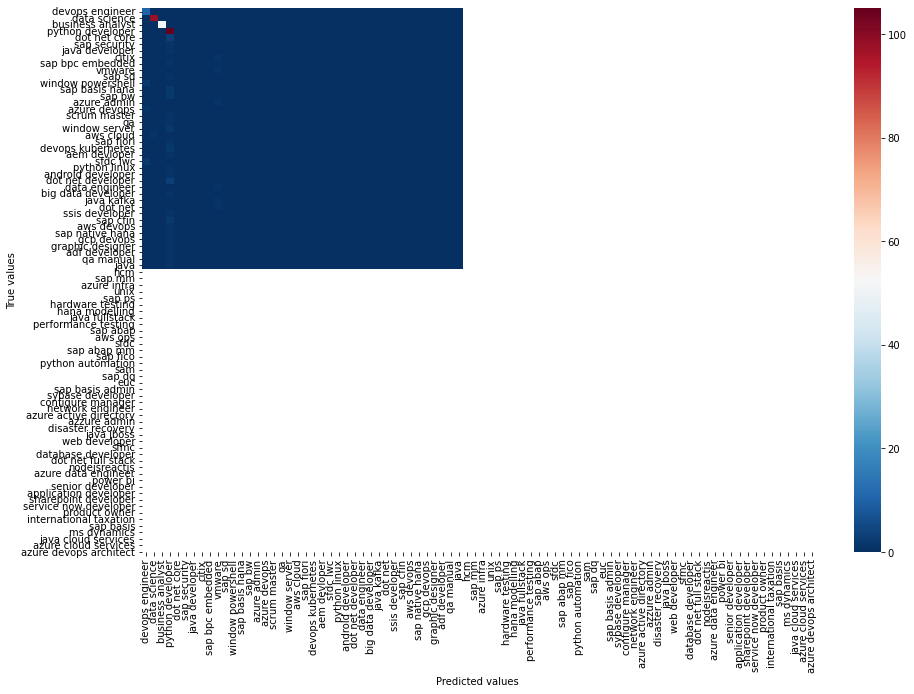

In [164]:
# Compute the confusion matrix and display it as a heatmap.
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))

# neat heat map
sns.heatmap(conf_mat , cmap="RdBu_r", xticklabels = categories, yticklabels = categories)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()